# Pretrained Models - Kunskapskontroll

**Obligatoriskt att fylla i uppgifterna nedan.**

Namn: Daniel Borgenstedt

Vem du har presenterat för: 

Datum då du presenterade: 2024-05-08

**Kunskapskontrollen lämnas in på Omniway.**

**It is possible to load pretrained models which is a powerful concept.**

Model implementation: 
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [3]:
model = ResNet50(weights='imagenet')

In [ ]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
img_path = 'tennisboll.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [4]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [5]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [6]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [7]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 1s/step
Predicted: [('n04409515', 'tennis_ball', 0.9999969), ('n04039381', 'racket', 2.7893084e-06), ('n03942813', 'ping-pong_ball', 5.5036548e-08)]


# 1. Take some pictures yourself and predict their class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted: banana, Probability: 0.89


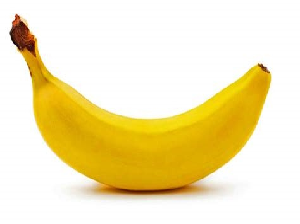

In [22]:
def showpic(PATH, target_size=(224, 224)):
    path = PATH
    pic = image.load_img(path, target_size=target_size)
    return pic

def predictpic(PATH, target_size=(224, 224)):
    path = PATH
    pic = image.load_img(path, target_size=target_size)

    arr_pic = image.img_to_array(pic)
    expand_pic = np.expand_dims(arr_pic, axis=0)
    pr_pic = preprocess_input(expand_pic)
    
    preds = model.predict(pr_pic)
    
    d_pred = decode_predictions(preds, top=1)
    top_pred = d_pred[0][0] 
    _, obj, probability = top_pred

    print(f'Predicted: {obj}, Probability: {probability:.2f}')

predictpic('banana.jpg')
showpic('banana.jpg',(224, 300))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: king_penguin, Probability: 0.94


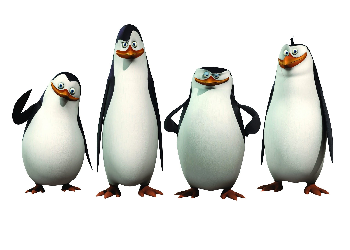

In [24]:
predictpic('penguin.jpg')
showpic('penguin.jpg', (250, 350))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: Madagascar_cat, Probability: 0.80


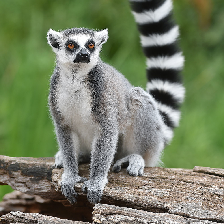

In [19]:
predictpic('lemur.jpg')
showpic('lemur.jpg')

# 2. Answer the question: Why is "Pretrained models" a very powerful concept?

Some of the benefits are:

* Save time on training because someone else have already done the work.
* Gives access to models to those who have limited resources
* They can generalize better and perform better due to to being pre-trained.
Starting with a pretrained model can lead to better predictions compared to models trained from scratch.
* They can be used for transfer learning